## EDA - Heart Disease UCI

From https://www.kaggle.com/ronitf/heart-disease-uci

Data Columns:

1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DATA_PATH = '../sergey-msu/ml_project/data/raw/heart.csv'

### Stats

In [3]:
data = pd.read_csv(DATA_PATH)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
if (data.shape == data.dropna().shape):
    print('no nans')

no nans


In [6]:
categorical_feats = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
numerical_feats = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']
target_col = 'target'

In [7]:
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

### Distributions

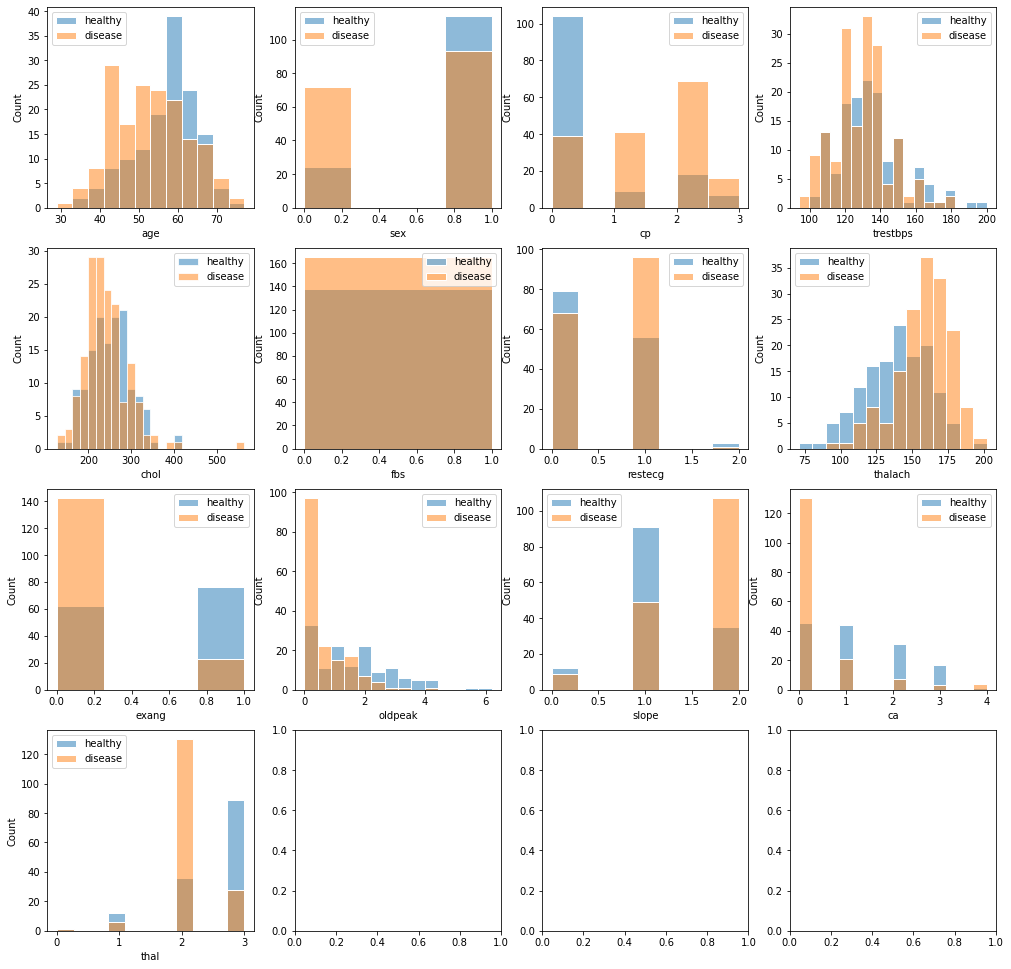

In [9]:
fig, axes = plt.subplots(4, 4, figsize=(17, 17))
for i in range(len(data.columns) - 1):
    feat = data.columns.values[i]
    ax = axes[i // 4][i % 4]
    bins = np.histogram_bin_edges(data[feat], bins='fd')
    sns.histplot(data[data['target'] == 0][feat], bins=bins, 
                 ax=ax, alpha=0.5, color='#1f77b4', edgecolor="w", 
                 label='healthy')
    sns.histplot(data[data['target'] == 1][feat], bins=bins, 
                 ax=ax, alpha=0.5, color='#ff7f0e', edgecolor="w", 
                 label='disease')
    ax.legend()

plt.show()

### Correlations

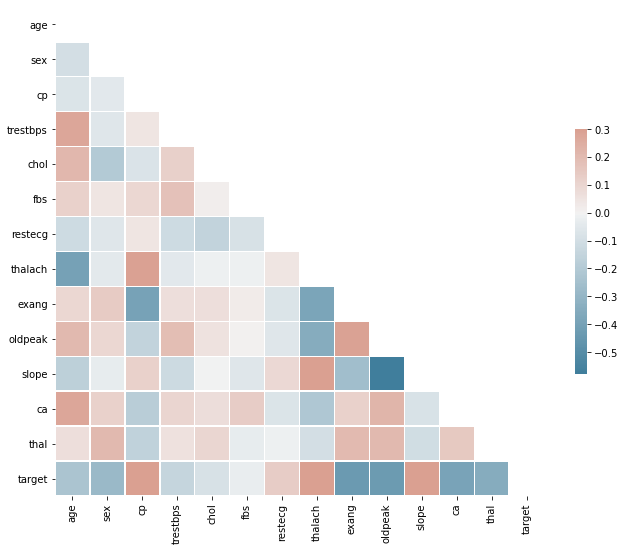

In [10]:
fig, axes = plt.subplots(figsize=(11, 9))

corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

### Outliers

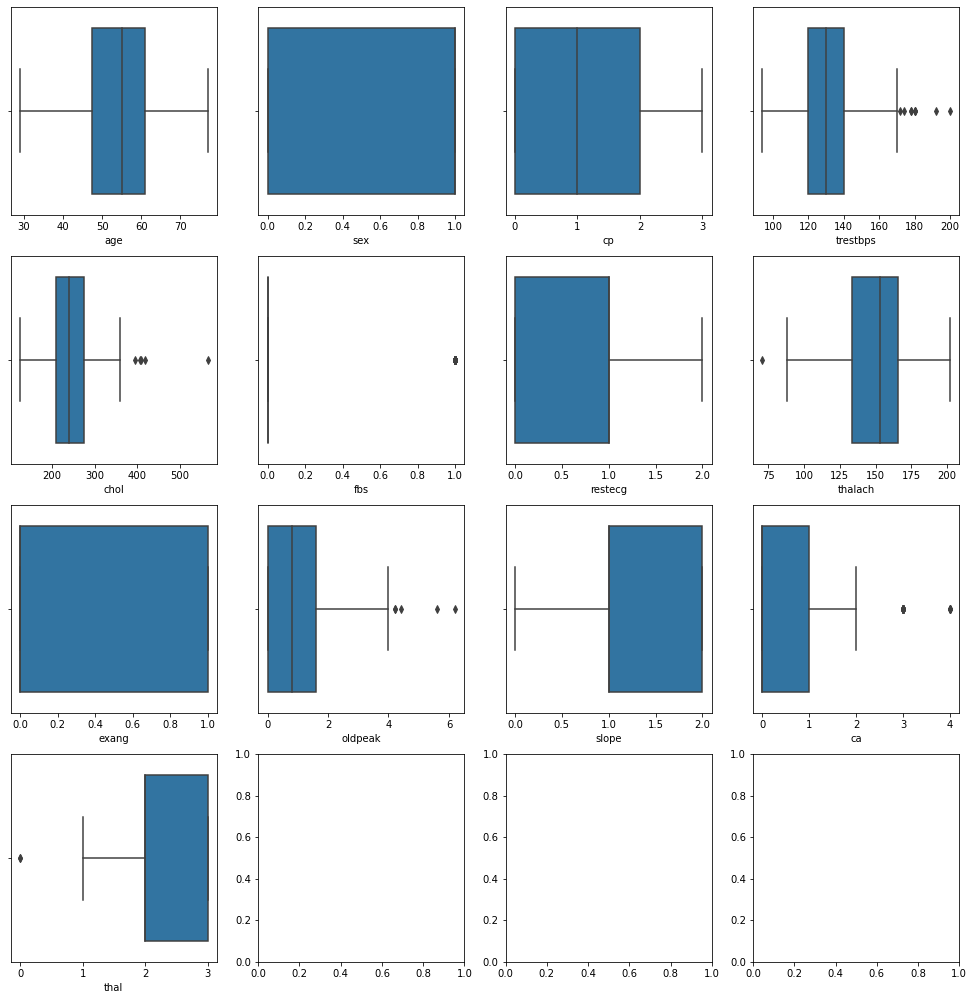

In [11]:
fig, axes = plt.subplots(4, 4, figsize=(17, 17))
for i in range(len(data.columns) - 1):
    feat = data.columns.values[i]
    ax = axes[i // 4][i % 4]
    sns.boxplot(x=data[feat], ax=ax)

plt.subplots_adjust(bottom=0.1)
plt.show()

### Pairs

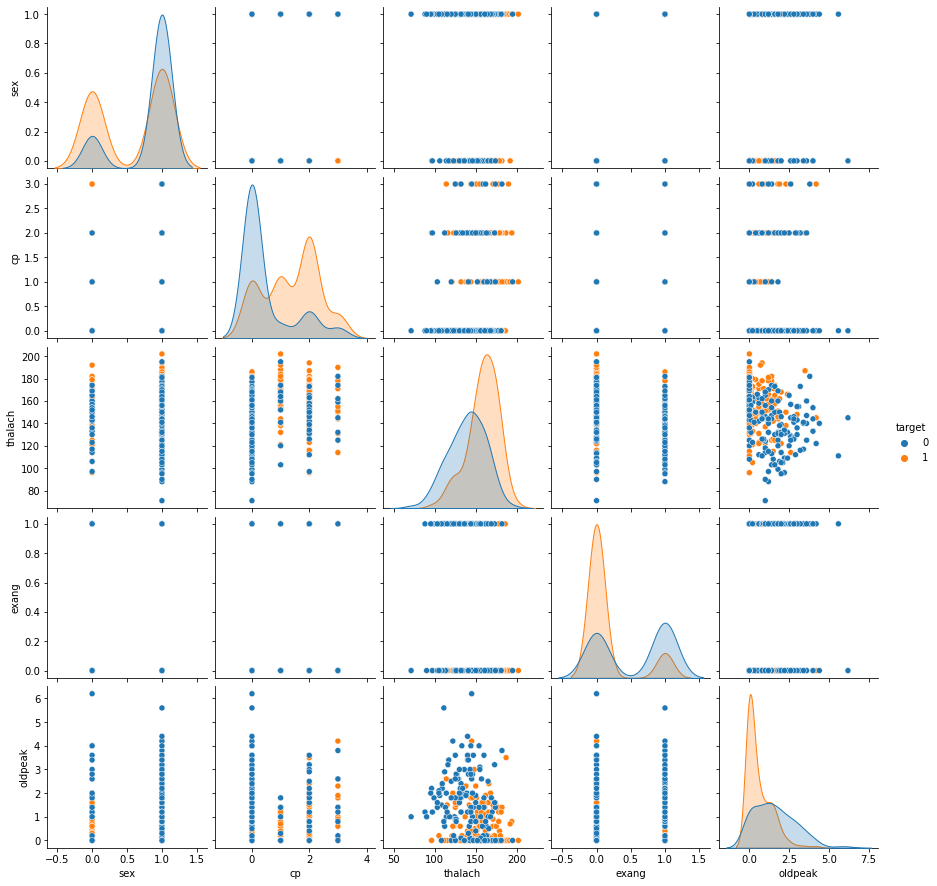

In [12]:
sns.pairplot(data[['sex', 'cp', 'thalach', 'exang', 'oldpeak', 'target']], hue="target")